In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import lasio 
import matplotlib.pyplot as plt


Read Data

logs data & Tops Data 

In [ ]:
# Load the LAS file
las = lasio.read("C:/Users/Firza Rizaldi/OneDrive/Geores - Well Upscaled/Litho classification/Well Data/XXX_logs.las")
df = las.df() 
df['DEPTH'] = df.index

# Load the Tops file
df2 = pd.read_csv('C:/Users/Firza Rizaldi/OneDrive/Geores - Well Upscaled/Litho classification/Well Marker/XXX_tOPS.txt', delim_whitespace=True, names=['Top', 'Bottom', 'Fm'])
df

C:\Users\Firza Rizaldi\AppData\Local\Temp\ipykernel_29812\247304142.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df2 = pd.read_csv('C:/Users/Firza Rizaldi/OneDrive/Geores - Well Upscaled/Litho classification/Well Marker/MBU-01.txt', delim_whitespace=True, names=['Top', 'Bottom', 'Fm'])


,CALI,NPHI,RHOB,DT,GR,LLD,DEPTH
DEPTH,,,,,,,
397.7638,12.7188,0.5513,1.6377,56.5000,36.4688,4.1478,397.7638
397.9162,12.7188,0.5649,1.6797,56.3125,38.0625,0.1639,397.9162
398.0686,12.7188,0.6006,1.7793,55.6875,42.0625,0.1393,398.0686
398.2210,12.7188,0.6074,1.8457,56.0000,45.7500,0.1404,398.2210
398.3734,12.7188,0.6148,1.8486,57.6250,45.8750,0.1444,398.3734
...,...,...,...,...,...,...,...
2120.9507,5.4492,0.0772,2.5977,NaN,NaN,NaN,2120.9507
2121.1030,5.4492,0.0772,2.5996,NaN,NaN,NaN,2121.1030
2121.2554,5.4492,0.0772,2.5996,NaN,NaN,NaN,2121.2554


In [6]:
# Interpolating missing values

df['GR'] = df['GR'].interpolate()
df['LLD'] = df['LLD'].interpolate()
df['NPHI'] = df['NPHI'].interpolate()
df['RHOB'] = df['RHOB'].interpolate()
df['CALI'] = df['CALI'].interpolate()
df['DT'] = df['DT'].interpolate()

Initial Logs Plot

Calculate the Vp, Acoustic Impedance, and Refflection Coefficient

In [7]:
df['Vp'] = 1e6 / df['DT']
df['AI'] = df['RHOB'] * df['Vp']
df['RC'] = (df['AI'].shift(-1) - df['AI']) / (df['AI'].shift(-1) + df['AI'])

Logs Disp

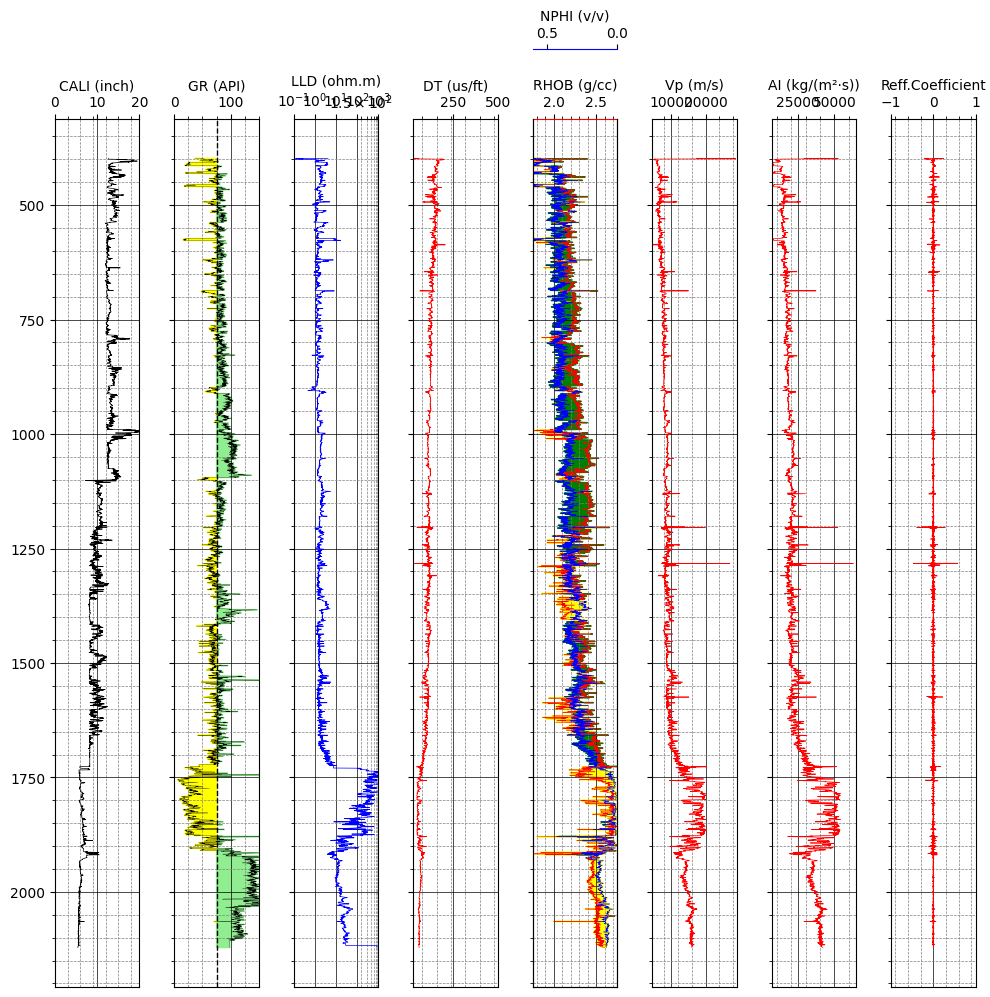

In [8]:
from well_display import *

plot_well_logs1(df)

Log Histogram

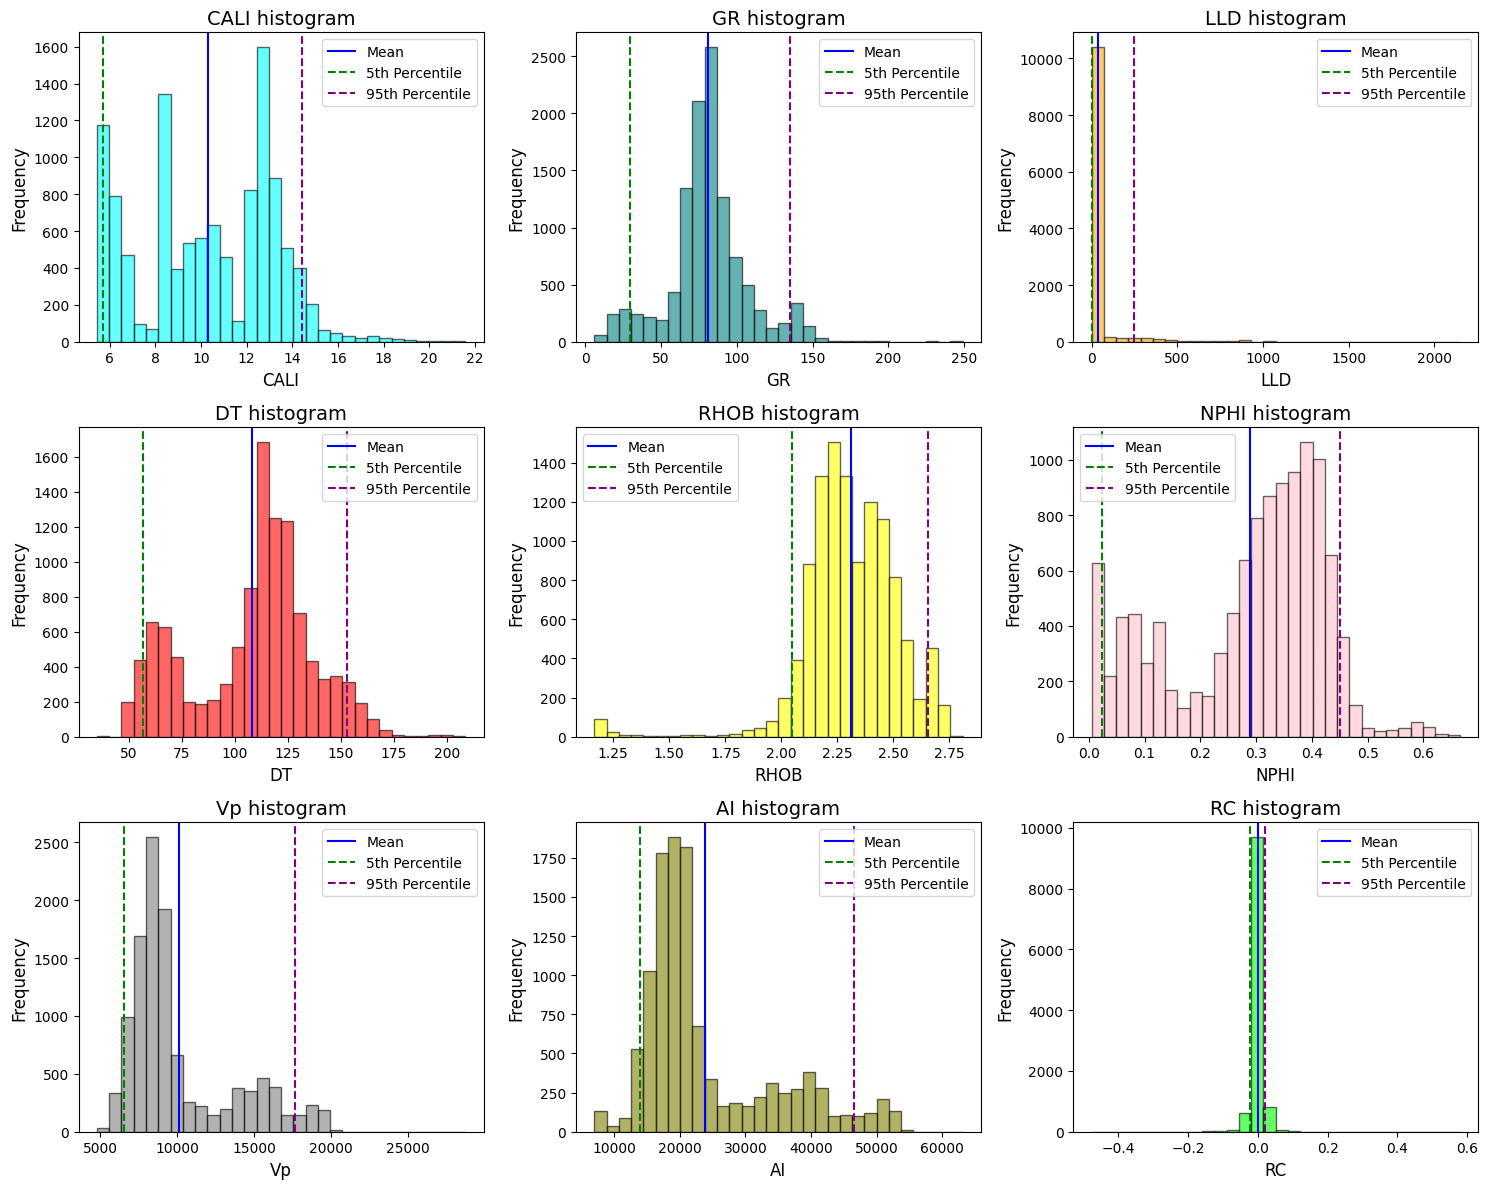

,Mean,P05,P95
CALI,10.302644,5.722700,14.445300
GR,80.766595,29.227380,134.875000
LLD,36.417735,1.157300,250.135810
DT,108.180041,56.596875,152.750000
RHOB,2.309517,2.046900,2.652300
NPHI,0.288954,0.023175,0.450200
Vp,10125.023309,6546.644845,17668.825388
AI,23899.935009,13933.783050,46487.971806
RC,0.000014,-0.021339,0.021944


In [9]:
from Log_Hist import *
columns = ['CALI','GR','LLD','DT','RHOB','NPHI','Vp','AI','RC'] 
stats_df = calculate_statistics(df, columns)
plot_histograms(df, columns)
stats_df

Lithology Classification and Histogram

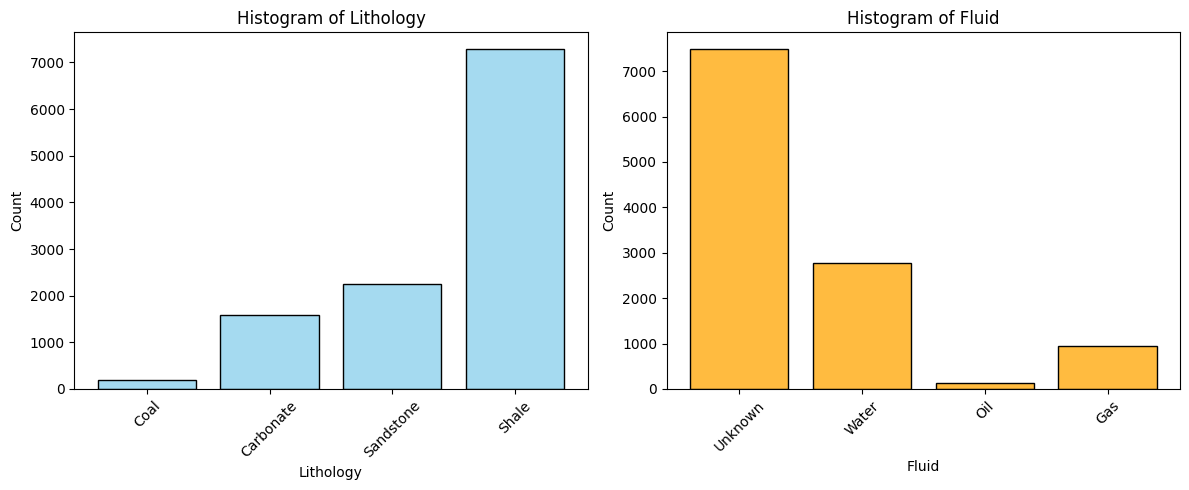

In [10]:
from Lithology_Class import *
classify_and_plot_histogram(df)

Litho Predictioning

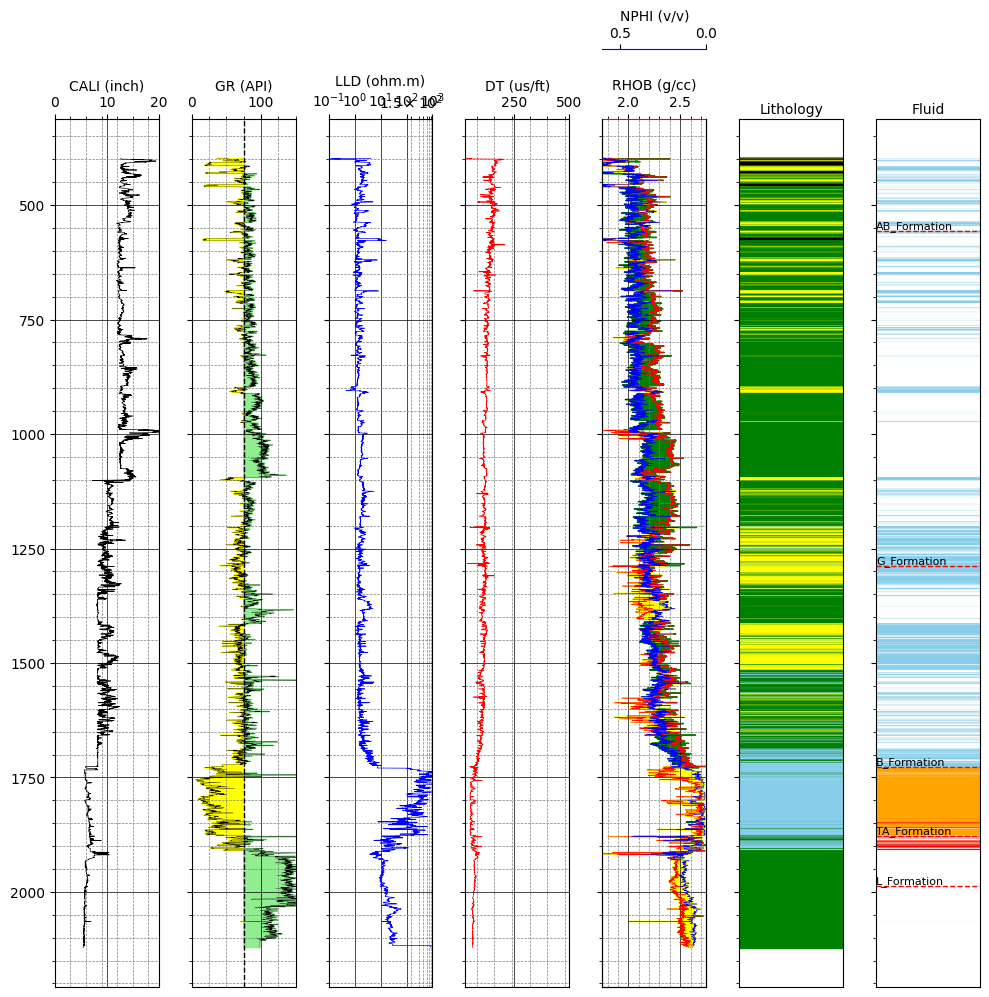

In [11]:
from well_display import *

plot_well_logs4(df, df2)